In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
df = pd.read_csv(r"world_bank_data_2025.csv")

In [3]:
df.head(5)

country_name country_id  year  Inflation (CPI %)  GDP (Current USD)  \
0    Indonesia         id  2010           5.134204       7.550000e+11   
1    Indonesia         id  2011           5.356048       8.930000e+11   
2    Indonesia         id  2012           4.279500       9.180000e+11   
3    Indonesia         id  2013           6.412513       9.130000e+11   
4    Indonesia         id  2014           6.394925       8.910000e+11   

   GDP per Capita (Current USD)  Unemployment Rate (%)  \
0                   3065.683484                  5.614   
1                   3579.464425                  5.153   
2                   3632.272540                  4.468   
3                   3566.602845                  4.336   
4                   3441.068085                  4.049   

   Interest Rate (Real, %)  Inflation (GDP Deflator, %)  \
0                -1.746098                    15.264294   
1                 4.594377                     7.465943   
2                 7.750189                     3.753879   
3                 6.374931                     4.965990   
4                 6.792119                     5.443175   

   GDP Growth (% Annual)  Current Account Balance (% GDP)  \
0               6.223854                         0.681277   
1               6.169784                         0.188704   
2               6.030051                        -2.660274   
3               5.557264                        -3.189965   
4               5.006668                        -3.088169   

   Gross National Income (USD)  
0                 7.350000e+11  
1                 8.680000e+11  
2                 8.920000e+11  
3                 8.850000e+11  
4                 8.610000e+11

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     14 non-null     object 
 1   country_id                       14 non-null     object 
 2   year                             14 non-null     int64  
 3   Inflation (CPI %)                14 non-null     float64
 4   GDP (Current USD)                14 non-null     float64
 5   GDP per Capita (Current USD)     14 non-null     float64
 6   Unemployment Rate (%)            14 non-null     float64
 7   Interest Rate (Real, %)          14 non-null     float64
 8   Inflation (GDP Deflator, %)      14 non-null     float64
 9   GDP Growth (% Annual)            14 non-null     float64
 10  Current Account Balance (% GDP)  14 non-null     float64
 11  Gross National Income (USD)      14 non-null     float64
dtypes: float64(9), int64(1),

In [5]:
df.isnull().sum()

country_name                       0
country_id                         0
year                               0
Inflation (CPI %)                  0
GDP (Current USD)                  0
GDP per Capita (Current USD)       0
Unemployment Rate (%)              0
Interest Rate (Real, %)            0
Inflation (GDP Deflator, %)        0
GDP Growth (% Annual)              0
Current Account Balance (% GDP)    0
Gross National Income (USD)        0
dtype: int64

In [6]:
cols_corr = df.drop(columns=['country_name','country_id','year'])

In [7]:
correlation_matrix = cols_corr.corr()
print(correlation_matrix)

                                 Inflation (CPI %)  GDP (Current USD)  \
Inflation (CPI %)                         1.000000          -0.569379   
GDP (Current USD)                        -0.569379           1.000000   
GDP per Capita (Current USD)             -0.526771           0.992980   
Unemployment Rate (%)                     0.390772          -0.841382   
Interest Rate (Real, %)                  -0.113207          -0.061203   
Inflation (GDP Deflator, %)               0.374090          -0.313566   
GDP Growth (% Annual)                     0.544334          -0.212386   
Current Account Balance (% GDP)          -0.298403           0.353401   
Gross National Income (USD)              -0.567245           0.999738   

                                 GDP per Capita (Current USD)  \
Inflation (CPI %)                                   -0.526771   
GDP (Current USD)                                    0.992980   
GDP per Capita (Current USD)                         1.000000   
Unemploym

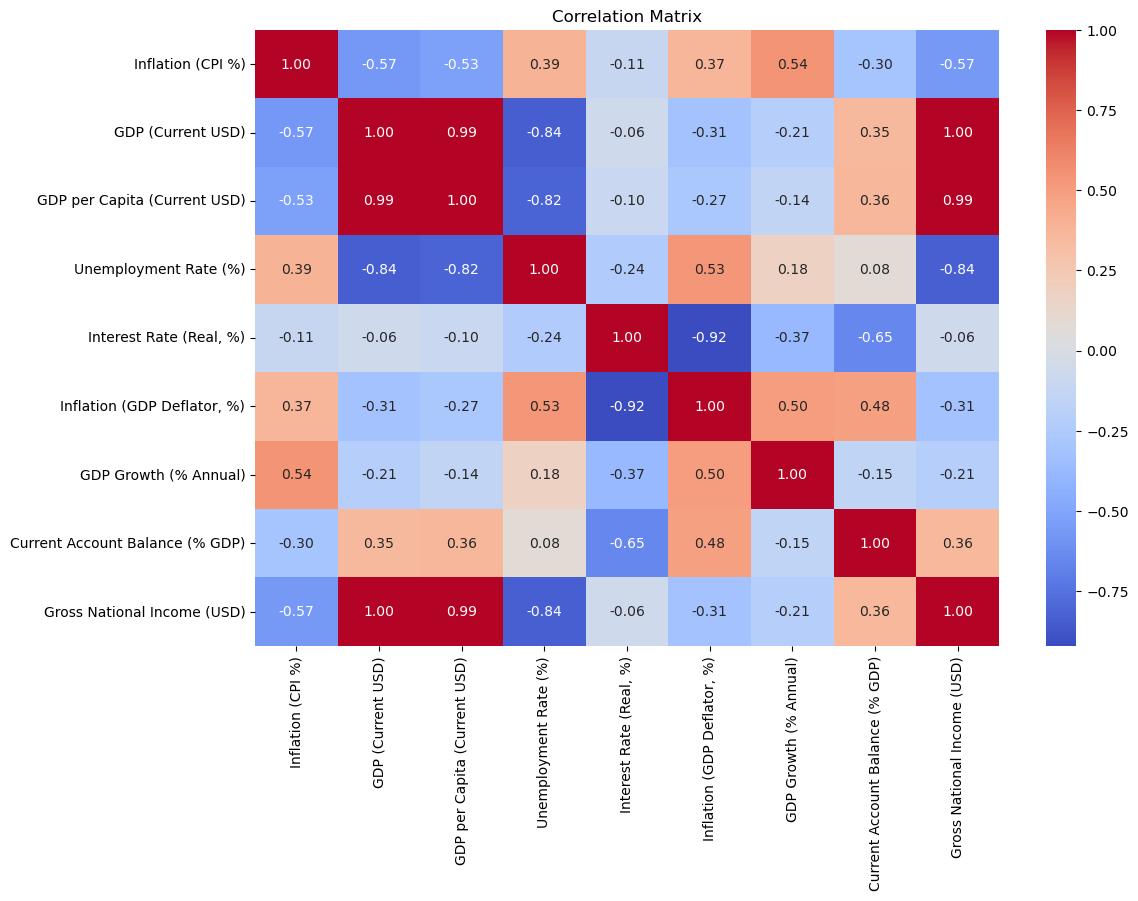

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
X =df.drop(columns=['country_name','country_id','year','Inflation (CPI %)'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define target and features
Y = df[['Inflation (GDP Deflator, %)']]
X = df.drop(columns=['country_name', 'country_id', 'year', 'Inflation (GDP Deflator, %)'])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Intercept:", model.intercept_[0])
print("Coefficients:")
print(pd.Series(model.coef_[0], index=X.columns))
print("\nR² score on test set:", r2_score(y_test, y_pred))


Intercept: 41.537991841719155
Coefficients:
Inflation (CPI %)                 -8.228316e-02
GDP (Current USD)                 -1.749434e-10
GDP per Capita (Current USD)      -5.775439e-03
Unemployment Rate (%)             -1.804925e+00
Interest Rate (Real, %)           -1.118150e+00
GDP Growth (% Annual)              2.192100e-01
Current Account Balance (% GDP)    3.528358e-01
Gross National Income (USD)        1.799666e-10
dtype: float64

R² score on test set: 0.9662920639476966


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model.fit(X_scaled, Y)


LinearRegression()

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, Y)


Ridge()

In [13]:
linear = LinearRegression().fit(X_train, y_train)

print("R² Linear:", linear.score(X_test, y_test))

R² Linear: 0.9662920639476966


In [14]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_scaled, Y)
y_pred = ridge.predict(X_scaled)
print("R2 score:", r2_score(Y, y_pred))

R2 score: 0.9897239720835947
